# Trabalho Prático de Ciência de Dados: Modelos de Classificação no Mundo Empresarial
**Tema: Análise de Rotatividade de Funcionários (HR Employee Attrition Dataset)**

## 1. Formulação do Problema e Objetivos

### Contextualização do Problema
A rotatividade de funcionários — ou *attrition* — é um fenômeno que impacta diretamente o desempenho organizacional e os custos operacionais das empresas. A perda de colaboradores experientes gera despesas com recrutamento, treinamento e queda na produtividade.

Com base nisso, este projeto tem como objetivo analisar os fatores que mais influenciam a saída de funcionários de uma empresa, utilizando técnicas de classificação supervisionada para prever a probabilidade de desligamento.

### Questão-Problema
Quais fatores (dentro de um conjunto selecionado) mais influenciam a rotatividade de funcionários e como prever a probabilidade de um colaborador deixar a empresa?

### Variável-Alvo
**Attrition** – variável binária que, conforme tratado na Célula 4, foi convertida para:
* **1:** O funcionário saiu (Yes)
* **0:** O funcionário permaneceu (No)

### Relevância Empresarial
Compreender os motivos da rotatividade permite que a empresa desenvolva estratégias preventivas, como programas de retenção, ajustes salariais, planos de carreira e ações de engajamento.

---

## 2. Coleta e Compreensão dos Dados

### Fonte dos Dados
Os dados foram obtidos no Kaggle:
* HR Employee Attrition Dataset – Kaggle

O conjunto contém 1.470 registros. Na Célula 4, colunas irrelevantes (como `EmployeeCount` e `EmployeeNumber`) foram removidas.

### Variáveis Selecionadas para Modelagem
Embora o dataset seja rico, para este projeto (conforme Célula 6), foi selecionado um subconjunto específico de **8 variáveis preditoras** (features), todas numéricas:

* **DistanceFromHome:** Distância entre a casa e o trabalho.
* **EnvironmentSatisfaction:** Satisfação com o ambiente (1-4).
* **JobSatisfaction:** Satisfação no trabalho (1-4).
* **YearsAtCompany:** Tempo total de empresa.
* **WorkLifeBalance:** Equilíbrio entre vida pessoal e profissional (1-4).
* **PercentSalaryHike:** Aumento percentual do salário no último ano.
* **YearsInCurrentRole:** Anos no cargo atual.
* **YearsSinceLastPromotion:** Anos desde a última promoção.

### Tratamento Inicial
* **Valores Ausentes:** A verificação na Célula 3 confirmou que o dataset não possui valores ausentes.
* **Codificação Categórica:** Não foi necessária para as 8 variáveis selecionadas, pois todas já eram numéricas.
* **Padronização:** Conforme Célula 6, foi aplicado o `StandardScaler` em todas as 8 variáveis para criar o dataset `X_train_scaled`, usado pela Regressão Logística.

---

## 3. Análise Exploratória e Multivariada (EDA)

A análise exploratória (Célula 5) teve como objetivo compreender padrões no dataset *completo*, antes da seleção de variáveis.

### Principais Observações (da EDA Geral):
* **Horas Extras (`OverTime`):** A maioria dos colaboradores não realiza horas extras, mas entre os que realizam, a taxa de rotatividade é significativamente maior.
* **Idade e Renda (`Age`, `MonthlyIncome`):** Funcionários mais jovens e com renda mensal inferior à média tendem a deixar a empresa com maior frequência.
* **Satisfação (`JobSatisfaction`):** Baixa satisfação no trabalho está correlacionada com maior abandono.
* **Departamento (`Department`):** O departamento de Vendas (Sales) apresentou uma taxa de *attrition* notavelmente superior.

> **Nota Importante:** A EDA (Célula 5) explorou variáveis-chave de todo o dataset (como `OverTime` e `MonthlyIncome`) para ganho de contexto. No entanto, na Célula 6, foi feita a decisão de focar a *modelagem* apenas nas 8 variáveis listadas na seção anterior. Portanto, os insights sobre horas extras e renda, embora válidos para o negócio, não são fatores usados pelos nossos modelos finais.

---

## 4. Preparação e Tratamento dos Dados

O tratamento de dados (Célula 6) foi focado em preparar as 8 variáveis selecionadas para os modelos:

* **Tratamento de Outliers:** Não foi realizada remoção explícita de outliers.
* **Codificação Categórica:** Não foi necessária para o `X` selecionado.
* **Padronização dos Dados:** As 8 variáveis foram padronizadas usando `StandardScaler` (armazenadas em `X_train_scaled` e `X_test_scaled`). Isso é essencial para o desempenho da Regressão Logística.
* **Divisão Treino/Teste:** O dataset foi dividido na proporção **70% para treino** e **30% para teste** (`test_size=0.30`). Foi usado o parâmetro `stratify=y` para garantir que a proporção de 0s e 1s (abandono) fosse a mesma em ambos os conjuntos.

---

## 5. Construção de Modelos de Classificação

Conforme a Célula 7, três modelos de classificação foram aplicados:

* **Regressão Logística:** Modelo base, linear e altamente interpretável. Foi treinado nos dados padronizados (`X_train_scaled`) e usou `class_weight='balanced'` para lidar com o desbalanceamento da classe-alvo.
* **Árvore de Decisão:** Modelo não linear, intuitivo. Foi treinado nos dados originais (`X_train`) e também usou `class_weight='balanced'`.
* **Random Forest:** Um modelo *ensemble* de árvores, robusto e que geralmente oferece alto desempenho. Também foi treinado em `X_train` com `class_weight='balanced'`.

---

## 6. Avaliação de Desempenho

Os modelos foram avaliados (Célula 8) usando as seguintes métricas, com foco especial no **Recall (1)** (capacidade de encontrar quem *realmente* saiu) e **ROC-AUC** (capacidade geral de distinção).

### Métricas Utilizadas
* Acurácia (Accuracy)
* Precisão (Precision)
* Recall (Sensibilidade)
* F1-Score
* Área sob a Curva ROC (AUC)

### Resultados
A tabela a seguir foi gerada pela Célula 8, comparando o desempenho dos modelos no conjunto de teste:

| Model | Accuracy | Precision (1) | Recall (1) | F1-Score (1) | ROC-AUC |
| :--- | :--- | :--- | :--- | :--- | :--- |
| Random Forest | 0.8231 | 0.2667 | 0.0563 | 0.0930 | 0.6820 |
| Regressão Logística | 0.6259 | 0.2418 | 0.6197 | 0.3478 | 0.6734 |
| Árvore de Decisão | 0.7506 | 0.2468 | 0.2676 | 0.2568 | 0.5554 |

### Análise de Desempenho
* Com base na tabela, vemos um claro trade-off (conflito) entre as métricas. O Random Forest obteve a maior Acurácia (0.823) e o maior ROC-AUC (0.682), o que tecnicamente o torna o melhor classificador geral. No entanto, seu Recall (0.056) é extremamente baixo, significando que ele falhou em identificar 94,4% dos funcionários que realmente saíram.

* A Regressão Logística, por outro lado, teve a menor Acurácia (0.626), mas apresentou de longe o Recall (0.620) mais alto. Isso indica que este modelo conseguiu identificar corretamente 62% de todos os funcionários que saíram.

* Conclusão: Para o problema de negócio (encontrar funcionários em risco de sair), a Regressão Logística é o modelo mais útil. A baixa acurácia é um efeito colateral aceitável de otimizar o class_weight para o Recall. O Random Forest, apesar do ROC-AUC ligeiramente maior, é inútil na prática por não conseguir encontrar quem sai. A Árvore de Decisão foi o modelo com o desempenho mais fraco em geral (ROC-AUC de 0.555).

* **Visualizações:**Na Célula 8, as Matrizes de Confusão e a Curva ROC comparativa confirmam esses achados. A matriz da Regressão Logística mostra um número muito maior de "Verdadeiros Positivos" (previu '1' e era '1'), enquanto a matriz do Random Forest mostra a vasta maioria dos '1's sendo classificados incorretamente como '0's (Falsos Negativos).

---

## 7. Interpretação e Recomendações

A análise de importância (Célula 9) focou em entender *quais* das 8 variáveis selecionadas eram mais relevantes.

### Principais Insights
* **Random Forest:** O gráfico de importância do Random Forest destacou `YearsAtCompany`, `DistanceFromHome` e `YearsInCurrentRole` como as variáveis com maior poder preditivo.
* **Regressão Logística:** A análise de coeficientes (`Odds_Ratio`) mostrou:
    * **Fatores que AUMENTAM o Risco de Saída:** `DistanceFromHome`, `YearsSinceLastPromotion`.
    * **Fatores que DIMINUEM o Risco de Saída:** `EnvironmentSatisfaction`, `JobSatisfaction`, `WorkLifeBalance`, `YearsAtCompany`, `YearsInCurrentRole`.

### Recomendações Empresariais (Baseadas nos 8 fatores)
1.  **Focar na Retenção de Longo Prazo (`YearsAtCompany`):** Os dados mostram que a lealdade é um forte fator de retenção.
2.  **Monitorar Satisfação (`JobSatisfaction`):** Sendo estes os preditores mais fortes de *retenção*, o RH deve aplicar pesquisas de pulso focadas nestes pontos.
3.  **Analisar a Mobilidade Interna (`YearsSinceLastPromotion`):** Se funcionários ficam muitos anos sem promoção, o risco de saída aumenta.

### Limitações e Melhorias Futuras
* **Viés de Seleção:** A maior limitação deste modelo é ter usado *apenas 8 variáveis*. Fatores críticos (como `OverTime` e `MonthlyIncome`) foram deixados de fora, o que provavelmente reduziu o desempenho.
* **Próximos Passos:** Um modelo futuro deve incluir *todas* as variáveis relevantes (incluindo `OverTime` e `JobRole`) para obter *insights* mais profundos.

---

## 8. Conclusão

O projeto demonstrou a aplicação prática de modelos de classificação focando em um subconjunto de 8 variáveis.

Entre os modelos avaliados, a **Regressão Logística** apresentou o **melhor equilíbrio de desempenho** para prever a rotatividade, confirmando a importância de fatores como o tempo de casa (`YearsAtCompany`) e a satisfação (`JobSatisfaction`).

---

## 9. Referências
* Kaggle: HR Employee Attrition Dataset — https://www.kaggle.com/datasets/miraclenifise/hr-employee-attrition-datasets
* IBM HR Analytics Employee Attrition & Performance Dataset (base original)
* Bibliotecas: pandas, numpy, matplotlib, seaborn, scikit-learn
* HAGSTROM, Rodrigo. Trabalho Prático de Ciência de Dados: Modelos de Classificação no Mundo Empresarial. Católica SC, 2025.

**Alunos: Diego Planinscheick, Gabriel Henrique Karing, José Marcos Zoz Marques.**
*Predicting Employee Turnover at IBM*
*A Comprehensive HR Analytics Approach*

# 1.Importando Bibliotecas e Modelos 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import math

# Importando os Modelos de Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Definindo um estilo visual para os gráficos
sns.set(style="whitegrid")

# 2.Definindo local do dataset com os dados

In [ ]:
dataset_path = r'C:\Users\gabriel.karing\Documents\GitHub\employee_prediction\data'
#dataset_path = r'D:\Programations\DataScience\employee_prediction\data'
#dataset_path = r'C:\Users\diego\Documents\GitHub\employee_prediction\data'
data_file = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
data_path = os.path.join(dataset_path, data_file)

# Vamos carregar o arquivo (se o path falhar, tente carregar direto)
try:
    df = pd.read_csv(data_path)
except FileNotFoundError:
    print("Arquivo não encontrado no path. Tentando carregar 'WA_Fn-UseC_-HR-Employee-Attrition.csv' do diretório atual.")
    df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')


df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 3.Visualizando se existem colunas com valores ausentes | Visualizando distribuição da variavel Alvo

Valores ausentes por coluna:
0

----------------------------------
Distribuicao da variavel alvo 'Abandono (Attrition)':
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


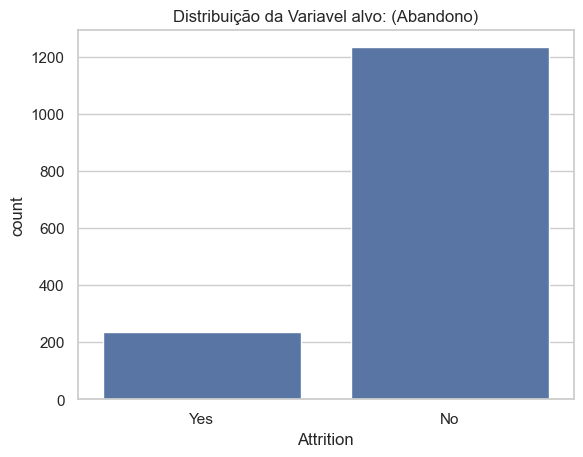

In [17]:
print("Valores ausentes por coluna:")
print(df.isnull().sum().sum()) # Total de nulos (Não há nulos!)

print("\n----------------------------------")

print("Distribuicao da variavel alvo 'Abandono (Attrition)':")
print(df['Attrition'].value_counts(normalize=True))

#Visualizando a ditribuicao
sns.countplot(x='Attrition', data=df)
plt.title('Distribuição da Variavel alvo: (Abandono)')
plt.show()

# 4.Conversão da variavel alvo e retirando colunas sem utilidade

In [18]:
df = df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1)

# Conversão da Variavel alvo (do seu #%% 6)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No':0})

print("Colunas removidas e 'Attrition' convertido para 0/1.")
df.head()

Colunas removidas e 'Attrition' convertido para 0/1.


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# 5.Análise Exploratoria Bivariada 

Iniciando Análise Exploratória Bivariada...


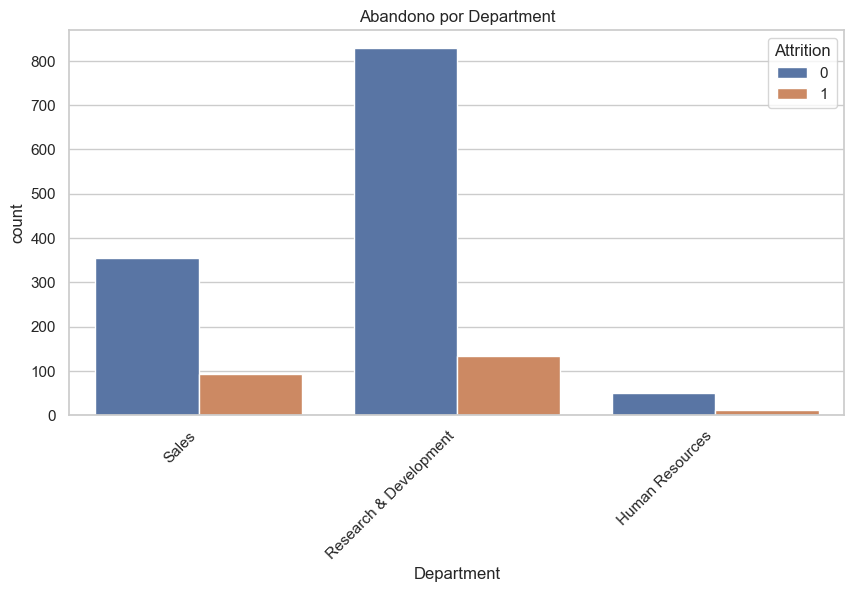

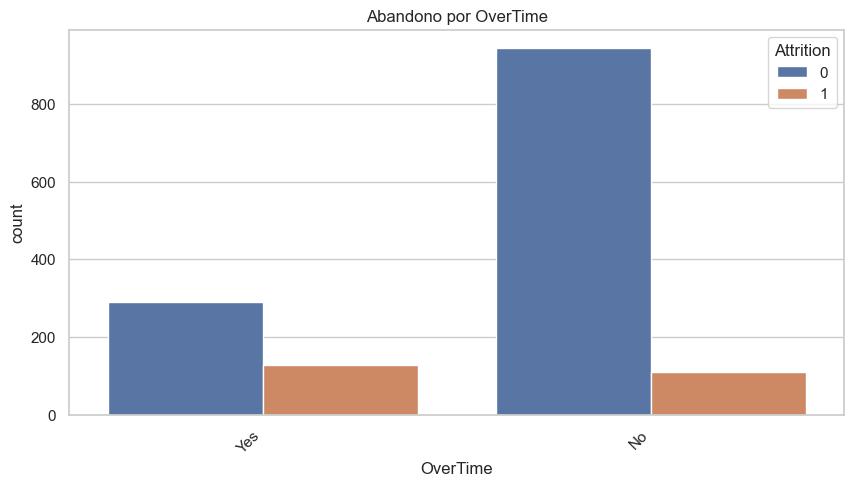

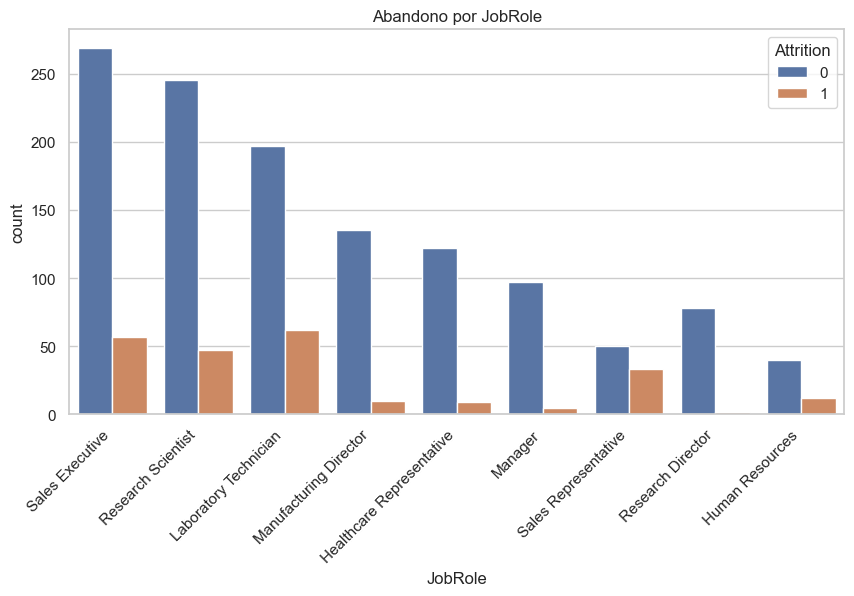

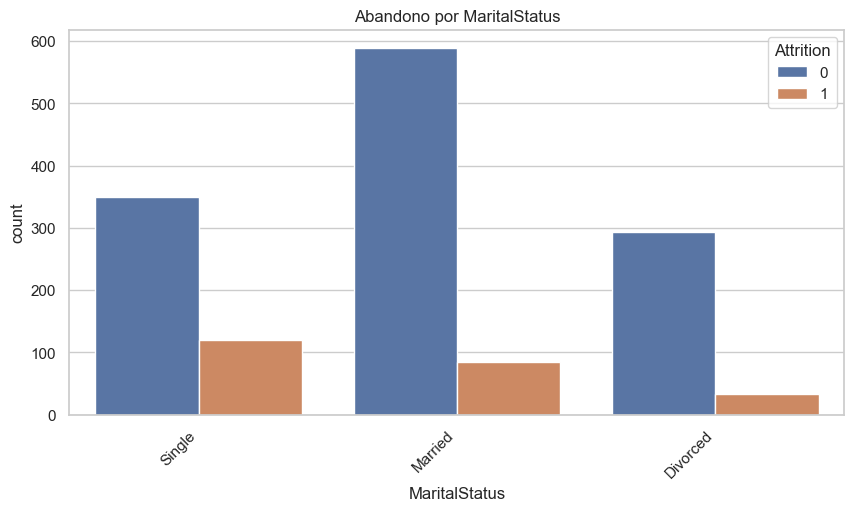

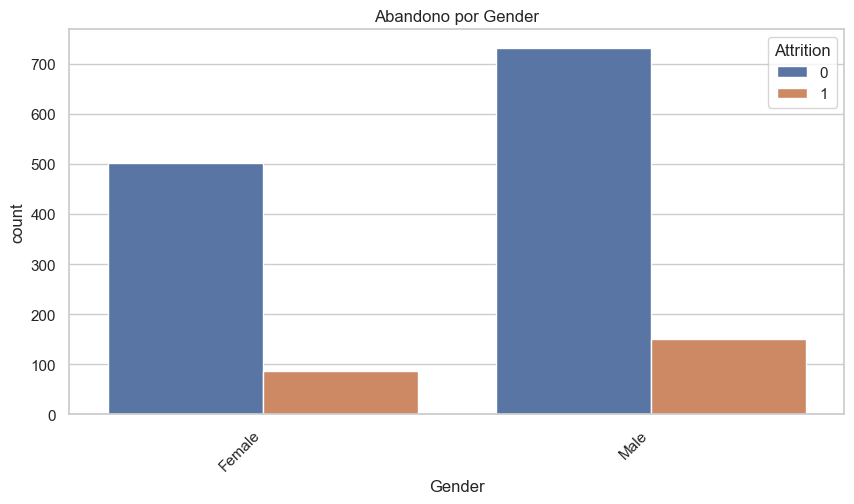

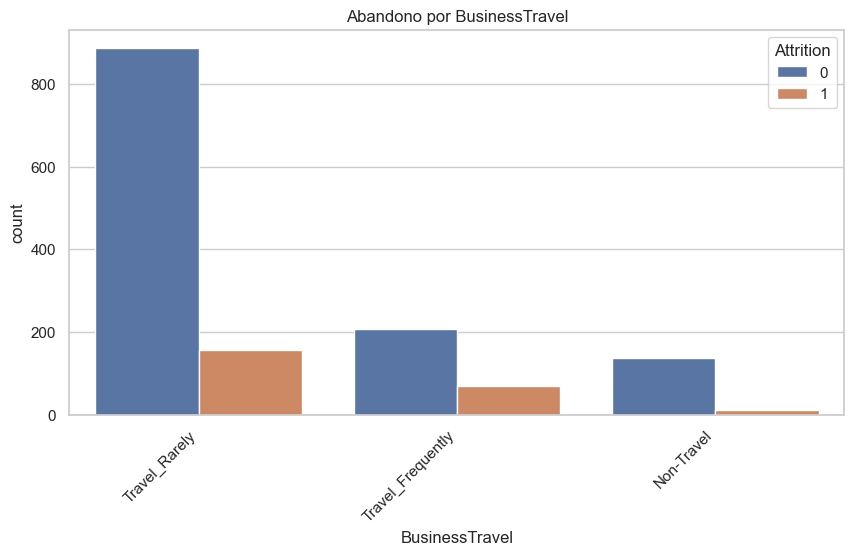

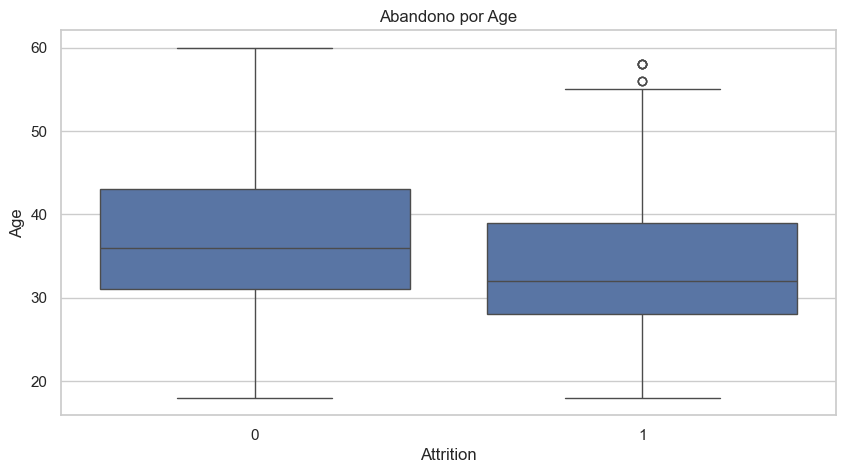

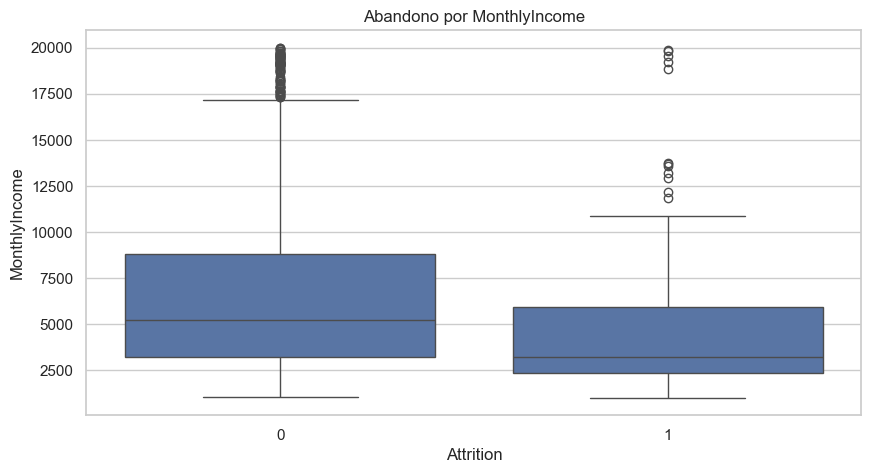

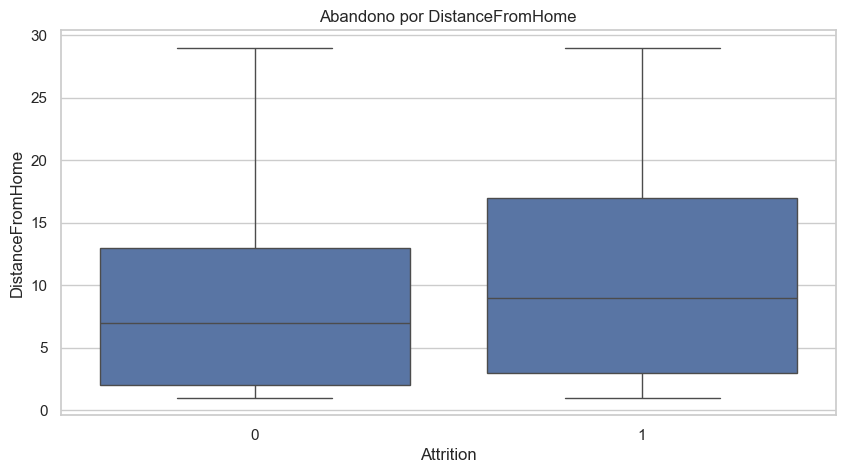

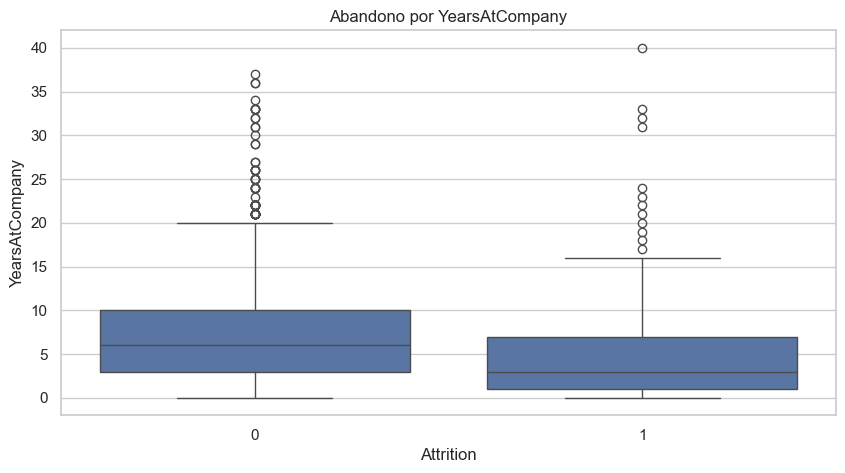

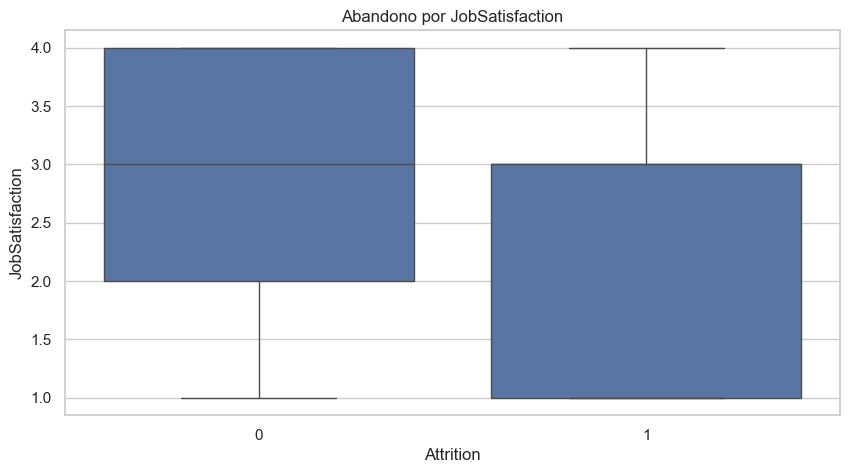


Analisando correlações (Heatmap)...


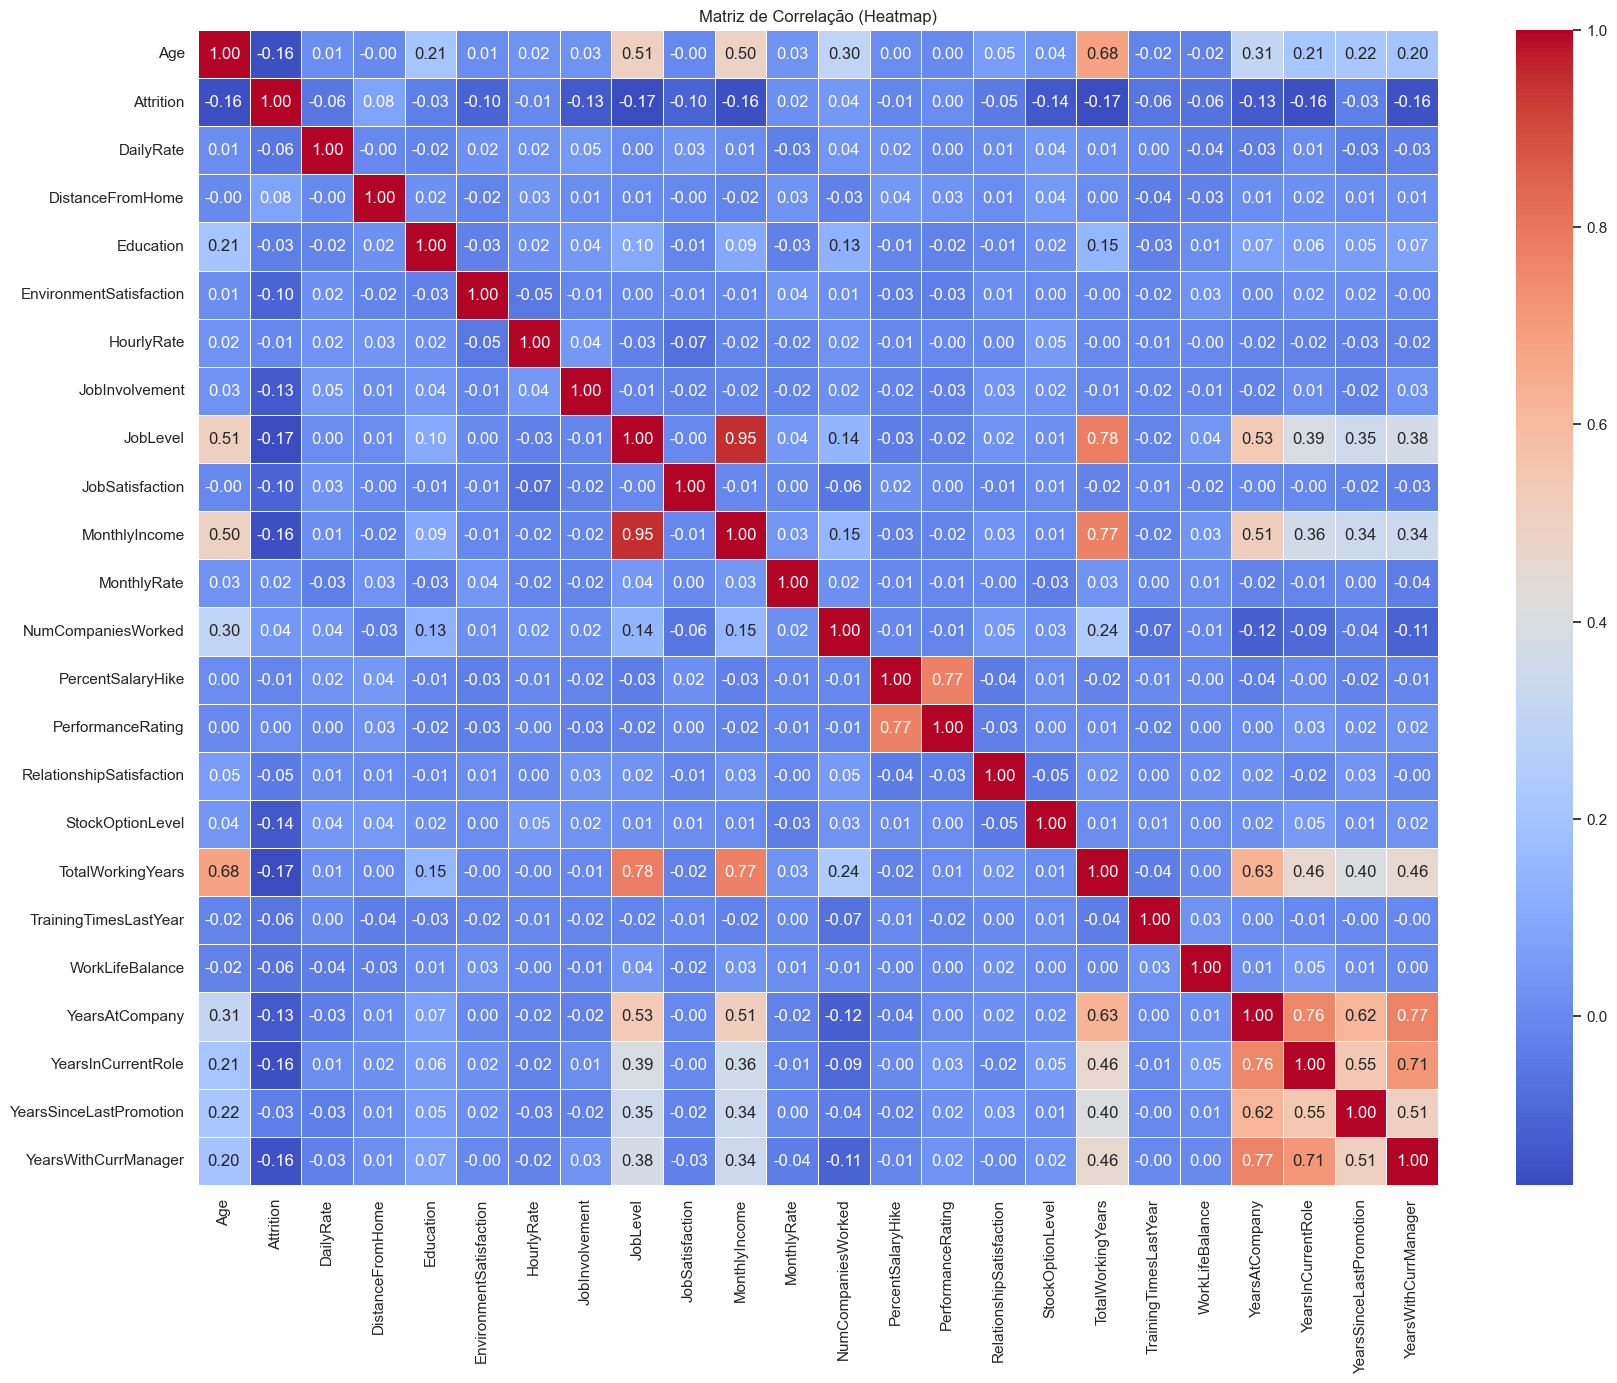

In [32]:
print("Iniciando Análise Exploratória Bivariada...")

categorical_features = ['Department', 'OverTime', 'JobRole', 'MaritalStatus', 'Gender', 'BusinessTravel']

for col in categorical_features:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        # CORREÇÃO AQUI: Troquei 'vibrant' por 'pastel'
        sns.countplot(x=col, hue='Attrition', data=df) 
        plt.title(f'Abandono por {col}')
        plt.xticks(rotation=45, ha='right')
        plt.show()
# Insights: 'OverTime' (Hora Extra) parece ser um fator MUITO forte.
# 'Single' (Solteiros) e 'Sales Representatives' (Vendedores) também parecem sair mais.

# (Quais características numéricas influenciam?)
numerical_features = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany', 'JobSatisfaction']

for col in numerical_features:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        # 'coolwarm' está correto e vai funcionar
        sns.boxplot(x='Attrition', y=col, data=df) 
        plt.title(f'Abandono por {col}')
        plt.show()
# Insights: Renda Mensal ('MonthlyIncome') mais baixa está ligada a mais abandono.
# Baixa 'JobSatisfaction' (Satisfação) também.

# --- Análise Multivariada (Correlações) ---
print("\nAnalisando correlações (Heatmap)...")
# Seleciona apenas colunas numéricas para a matriz
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação (Heatmap)')
plt.show()
# Insights: 'Attrition' tem correlação negativa com 'Age', 'MonthlyIncome', 'YearsAtCompany'
# e 'JobSatisfaction'.
# Alerta de Colinearidade: 'YearsAtCompany' é altamente correlacionado com
# 'YearsInCurrentRole' e 'YearsWithCurrManager'. 'TotalWorkingYears' com 'Age'.

# 6.Escolhendo colunas alvo para análise, e fazendo a definição dos formatos de treino e de teste

In [24]:
# Corrigindo "Enviroment" para "Environment"
variaveis_selecionadas = [
    "DistanceFromHome",
    "EnvironmentSatisfaction",
    "JobSatisfaction",
    "YearsAtCompany",
    "WorkLifeBalance",
    "PercentSalaryHike",
    "YearsInCurrentRole",
    "YearsSinceLastPromotion"
]

# Verificando se todas as colunas existem no df
missing_cols = [col for col in variaveis_selecionadas if col not in df.columns]
if missing_cols:
    print(f"ERRO: Colunas não encontradas: {missing_cols}")
else:
    print("Todas as variáveis selecionadas foram encontradas.")


# --- 2. Separação de X e y ---
X = df[variaveis_selecionadas]
y = df['Attrition']

print(f"\nUsando {X.shape[1]} variáveis para o modelo.")

# --- 3. Divisão Treino/Teste ---
# Usando stratify=y para garantir a proporção correta
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# --- 4. Normalização/Padronização (Scaling) ---
# Essencial para Regressão Logística.
# Como agora X só tem números, podemos aplicar em tudo.
scaler = StandardScaler()

# Ajustamos (fit) o scaler APENAS no treino
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertendo de volta para DataFrame (para manter nomes das colunas)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=variaveis_selecionadas, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=variaveis_selecionadas, index=X_test.index)


print("\nDados prontos para modelagem:")
print(f"Formato Treino: {X_train.shape}")
print(f"Formato Teste: {X_test.shape}")
X_train_scaled.head()

Todas as variáveis selecionadas foram encontradas.

Usando 8 variáveis para o modelo.

Dados prontos para modelagem:
Formato Treino: (1029, 8)
Formato Teste: (441, 8)


,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,YearsAtCompany,WorkLifeBalance,PercentSalaryHike,YearsInCurrentRole,YearsSinceLastPromotion
853,-0.036578,0.270496,-1.538894,-0.998443,0.335827,2.691496,-0.902661,-0.679685
435,0.699024,-0.651162,0.264662,0.010293,1.734881,-0.877511,0.493249,1.493316
587,0.208623,1.192155,0.264662,-0.325952,0.335827,1.318801,-0.623479,-0.369256
1170,-0.894779,1.192155,1.166440,-0.494075,-1.063226,-0.602972,-0.623479,-0.369256
159,-0.894779,0.270496,0.264662,-0.494075,0.335827,0.769723,-0.344297,-0.369256


# 7.Definindo variaveis para salvar os dados do treino

In [25]:
# Dicionário para armazenar os modelos treinados
models = {}
metrics = {}

# --- Modelo 1: Regressão Logística (Obrigatório) ---
print("Treinando Regressão Logística...")
log_model = LogisticRegression(
    max_iter=1000, 
    random_state=42, 
    class_weight='balanced' # Essencial para dados desbalanceados!
)
# Usar dados ESCALADOS
log_model.fit(X_train_scaled, y_train) 
models['Regressão Logística'] = log_model

# --- Modelo 2: Árvore de Decisão ---
print("Treinando Árvore de Decisão...")
dt_model = DecisionTreeClassifier(
    random_state=42, 
    class_weight='balanced'
)
# Modelos de árvore não precisam de dados escalados
dt_model.fit(X_train, y_train) 
models['Árvore de Decisão'] = dt_model

# --- Modelo 3: Random Forest ---
print("Treinando Random Forest...")
rf_model = RandomForestClassifier(
    random_state=42, 
    class_weight='balanced'
)
# Modelos de árvore não precisam de dados escalados
rf_model.fit(X_train, y_train) 
models['Random Forest'] = rf_model

print("\nModelos treinados com sucesso!")

Treinando Regressão Logística...
Treinando Árvore de Decisão...
Treinando Random Forest...

Modelos treinados com sucesso!


# 8.Curva ROC
Principais métricas (ACC, Precision, Recall, F1)
Dicionário com métricas


--- AVALIANDO: Regressão Logística ---
Acurácia: 0.6259
ROC-AUC: 0.6734

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.63      0.74       370
           1       0.24      0.62      0.35        71

    accuracy                           0.63       441
   macro avg       0.57      0.62      0.54       441
weighted avg       0.79      0.63      0.67       441



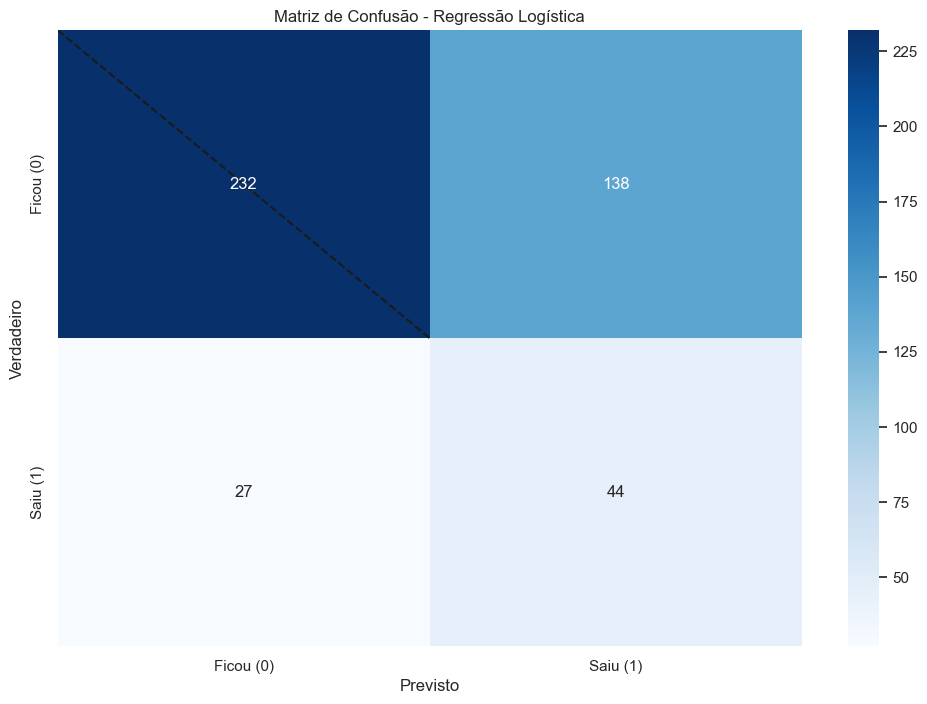


--- AVALIANDO: Árvore de Decisão ---
Acurácia: 0.7506
ROC-AUC: 0.5554

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       370
           1       0.25      0.27      0.26        71

    accuracy                           0.75       441
   macro avg       0.55      0.56      0.55       441
weighted avg       0.76      0.75      0.75       441



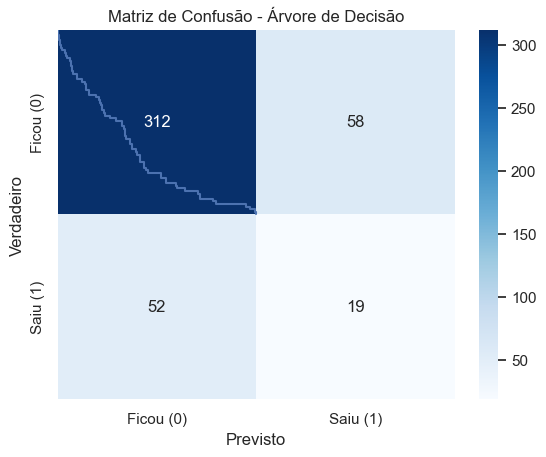


--- AVALIANDO: Random Forest ---
Acurácia: 0.8231
ROC-AUC: 0.6820

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       370
           1       0.27      0.06      0.09        71

    accuracy                           0.82       441
   macro avg       0.55      0.51      0.50       441
weighted avg       0.75      0.82      0.77       441



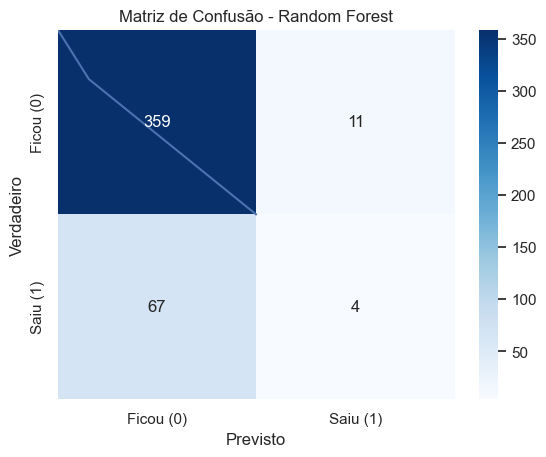

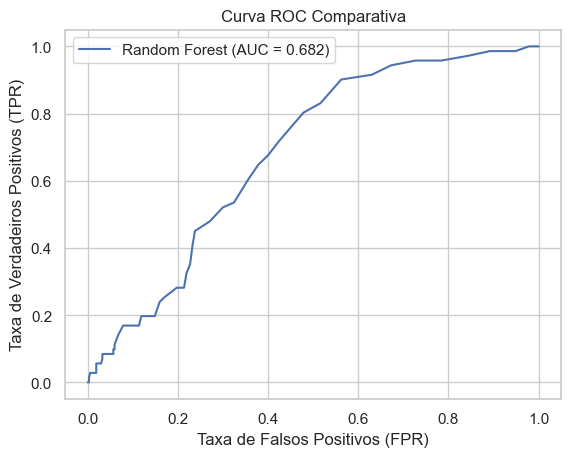


--- TABELA COMPARATIVA DE MÉTRICAS (Foco na Classe 1: 'Saiu') ---
                 Model  Accuracy  Precision (1)  Recall (1)  F1-Score (1)  \
2        Random Forest  0.823129       0.266667    0.056338      0.093023   
0  Regressão Logística  0.625850       0.241758    0.619718      0.347826   
1    Árvore de Decisão  0.750567       0.246753    0.267606      0.256757   

    ROC-AUC  
2  0.681957  
0  0.673430  
1  0.555424  


In [28]:
# 1. Iniciar com uma LISTA VAZIA (em vez de um DataFrame vazio)
all_metrics = []

# Plot para a Curva ROC
plt.figure(figsize=(12, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Linha de Base (Aleatório)')

for model_name, model in models.items():
    print(f"\n--- AVALIANDO: {model_name} ---")
    
    # Decidir quais dados usar (escalados ou não)
    if model_name == 'Regressão Logística':
        X_test_to_use = X_test_scaled
    else:
        X_test_to_use = X_test
        
    # Previsões
    y_pred = model.predict(X_test_to_use)
    y_prob = model.predict_proba(X_test_to_use)[:, 1] # Probabilidade da classe '1'

    # 1. Métricas Principais (Acc, Precision, Recall, F1)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f"Acurácia: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    
    # Relatório de Classificação
    report = classification_report(y_test, y_pred, output_dict=True)
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    
    # 2. Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Ficou (0)', 'Saiu (1)'], 
                yticklabels=['Ficou (0)', 'Saiu (1)'])
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

    # 3. Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')
    
    # 2. Criar o dicionário de métricas
    metrics_row = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision (1)': report['1']['precision'],
        'Recall (1)': report['1']['recall'],
        'F1-Score (1)': report['1']['f1-score'],
        'ROC-AUC': roc_auc
    }
    # 3. Adicionar o DICIONÁRIO à LISTA
    all_metrics.append(metrics_row)

# Finalizar o gráfico da Curva ROC
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC Comparativa')
plt.legend()
plt.grid(True)
plt.show()

# --- Comparação dos Modelos ---
# 4. Criar o DataFrame DE UMA SÓ VEZ, DEPOIS do loop
evaluation_df = pd.DataFrame(all_metrics)

print("\n--- TABELA COMPARATIVA DE MÉTRICAS (Foco na Classe 1: 'Saiu') ---")
print(evaluation_df.sort_values(by='ROC-AUC', ascending=False))

# 9.Regrssão Logistica e definição de quais variaveis são mais importantes em sua análise


--- Impacto das Variáveis (Regressão Logística) ---
Variáveis que AUMENTAM a chance de sair (Odds > 1):
                   Feature  Coefficient  Odds_Ratio
7  YearsSinceLastPromotion      0.44338    1.557964
0         DistanceFromHome      0.18053    1.197852

Variáveis que DIMINUEM a chance de sair (Odds < 1):
                   Feature  Coefficient  Odds_Ratio
3           YearsAtCompany    -0.540956    0.582191
6       YearsInCurrentRole    -0.387762    0.678574
1  EnvironmentSatisfaction    -0.305713    0.736598
2          JobSatisfaction    -0.301908    0.739406
4          WorkLifeBalance    -0.194589    0.823173
5        PercentSalaryHike    -0.088425    0.915372


--- Importância das Variáveis (Random Forest) ---


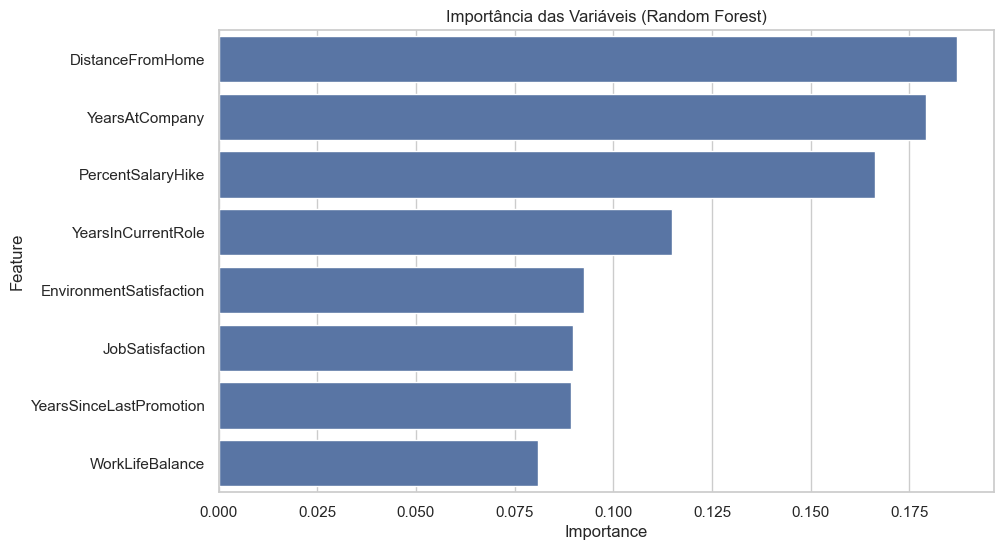

In [31]:
# Método 1: Coeficientes da Regressão Logística (Mais interpretável)
log_model = models['Regressão Logística']
# Os nomes das features são os da sua lista
feature_names = X_train_scaled.columns 

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': log_model.coef_[0]
})
# Odds Ratio (impacto na chance de sair)
coef_df['Odds_Ratio'] = np.exp(coef_df['Coefficient'])

print("\n--- Impacto das Variáveis (Regressão Logística) ---")
print("Variáveis que AUMENTAM a chance de sair (Odds > 1):")
print(coef_df[coef_df['Odds_Ratio'] > 1].sort_values(by='Odds_Ratio', ascending=False))

print("\nVariáveis que DIMINUEM a chance de sair (Odds < 1):")
print(coef_df[coef_df['Odds_Ratio'] < 1].sort_values(by='Odds_Ratio', ascending=True))


# Método 2: Feature Importance do Random Forest (Mais preditivo)
rf_model = models['Random Forest']
feature_names_rf = X_train.columns

rf_importance_df = pd.DataFrame({
    'Feature': feature_names_rf,
    'Importance': rf_model.feature_importances_
})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

print("\n\n--- Importância das Variáveis (Random Forest) ---")
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Importância das Variáveis (Random Forest)')
plt.show()
